<h1> Random Forest - Prediction using LendingClub Data</h1>

Here we will use Lending Club data to predict the state of a loan.

Source: https://www.lendingclub.com/info/download-data.action 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/lendClub/LoanStats3d ver7.csv")
y2015 = pd.read_csv(path1)

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
y2015.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,8650,8650,8650.0,36 months,19.89%,320.99,E,8 years,RENT,55000.0,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,15000,15000,15000.0,36 months,9.80%,482.61,B,3 years,MORTGAGE,92000.0,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check null status of the columns
y2015.isnull().sum()

loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
emp_length                                         0
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
title                                            132
zip_code                                           0
dti                                                2
delinq_2yrs                                        0
earliest_cr_line                              

In [14]:
y2015=y2015.dropna(axis='columns')

In [15]:
# Check to see how many unique categories we may need to create
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

term
2
int_rate
111
grade
7
emp_length
12
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
2
zip_code
914
earliest_cr_line
668
initial_list_status
2
application_type
2
hardship_flag
2
disbursement_method
1
debt_settlement_flag
2


In [16]:
# We need to drop more columns so ensemble model does not crash 
y2015 = y2015.drop('int_rate', 1)
y2015 = y2015.drop('zip_code', 1)
y2015 = y2015.drop('earliest_cr_line', 1)

In [17]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.98166793,  0.98176292,  0.98188165,  0.98142959,  0.9802655 ,
        0.98128666,  0.98019379,  0.95556664,  0.97793768,  0.90027786])

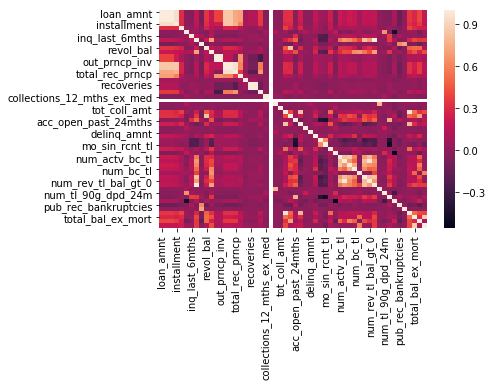

In [18]:
# Let's use correlation matrix to see if there are any variables that may cause overfitting and remove them in a second run

y2015_1 = y2015.copy() # Make a new copy

import seaborn as sns
sns.heatmap(y2015_1.corr())


In [19]:
y2015_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,8650,8650,8650.0,36 months,320.99,E,8 years,RENT,55000.0,Verified,...,100.0,1,0,38998,18926,2750,18248,N,Cash,N
1,15000,15000,15000.0,36 months,482.61,B,3 years,MORTGAGE,92000.0,Not Verified,...,100.0,1,0,347470,53397,36100,47370,N,Cash,N
2,14025,14025,14025.0,60 months,359.90,D,10+ years,MORTGAGE,39000.0,Verified,...,100.0,0,0,72286,15646,8800,0,N,Cash,N
3,20000,20000,20000.0,36 months,643.47,B,5 years,RENT,75000.0,Not Verified,...,92.3,0,0,117477,40090,51600,38577,N,Cash,N
4,15000,15000,15000.0,60 months,344.69,C,4 years,RENT,77213.0,Source Verified,...,100.0,1,0,176208,155521,13800,95668,N,Cash,N


In [20]:
# Let's remove features with high correlation and see how the model perform
y2015_1 = y2015_1.drop('loan_amnt', 1)
y2015_1 = y2015_1.drop('funded_amnt', 1)
y2015_1 = y2015_1.drop('funded_amnt_inv', 1)
y2015_1 = y2015_1.drop('out_prncp', 1)
y2015_1 = y2015_1.drop('out_prncp_inv', 1)


In [21]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X1 = y2015_1
Y1 = Y
X1 = pd.get_dummies(X1)

cross_val_score(rfc, X1, Y1, cv=10)

array([ 0.99992876,  0.99995251,  0.99995251,  0.99997625,  0.99992876,
        0.9999525 ,  1.        ,  0.99990501,  0.99983376,  0.99912129])